In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dateutil import parser
from datetime import timedelta, datetime

Data obtained from http://188.226.170.94/, the guy on [reddit](https://www.reddit.com/r/algotrading/comments/9kfvxk/historical_crypto_data/) claims it is from binance.

In [5]:
df = pd.read_csv("../data/data_samples/ETHBTC_1m.csv")

In [13]:
len(df) / 60 / 24

471.25347222222223

I guess the amount of data is decent

In [9]:
df.Volume.plot()

Having just 1 exchange for volume aggregating is less than optimal.

In [14]:
df.Close.plot()

In [9]:
cryptoarchive = pd.read_csv("../data/data_samples/ETHBTC_cryptoarchive.csv", sep='|', header=None,
                            names=['Timestamp','Open','High','Low','Close','Volume','TakerBuyQuoteAssetVolume',
                                   'TakerBuyBaseAssetVolume','QuoteAssetVolume','TradesNumber'])

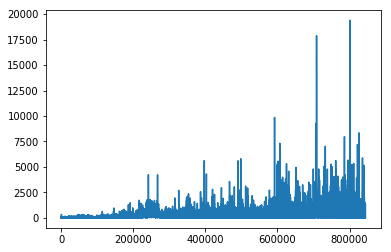

In [10]:
cryptoarchive.Volume.plot()

In [37]:
cryptoarchive.head()

Timestamp  Open  High   Low  Close  Volume  TakerBuyQuoteAssetVolume  \
0  1500004800  0.08  0.08  0.08   0.08   0.043                       0.0   
1  1500004860  0.08  0.08  0.08   0.08   0.000                       0.0   
2  1500004920  0.08  0.08  0.08   0.08   0.306                       0.0   
3  1500004980  0.08  0.08  0.08   0.08   0.212                       0.0   
4  1500005040  0.08  0.08  0.08   0.08   0.165                       0.0   

   TakerBuyBaseAssetVolume  QuoteAssetVolume  TradesNumber  
0                      0.0             0.003             1  
1                      0.0             0.000             0  
2                      0.0             0.024             2  
3                      0.0             0.017             1  
4                      0.0             0.013             2

In [38]:
df.head()

Open time  Open  High   Low  Close  Volume     Close time  \
0  1500004800000  0.08  0.08  0.08   0.08   0.043  1500004859999   
1  1500004860000  0.08  0.08  0.08   0.08   0.000  1500004919999   
2  1500004920000  0.08  0.08  0.08   0.08   0.306  1500004979999   
3  1500004980000  0.08  0.08  0.08   0.08   0.212  1500005039999   
4  1500005040000  0.08  0.08  0.08   0.08   0.165  1500005099999   

   Number of trades  
0                 1  
1                 0  
2                 2  
3                 1  
4                 2

Looks like cryptoarchive also gets the data from binance.

[cryptocompare](https://min-api.cryptocompare.com/) has very relaxed rate limits with which I could pull most of the minutely data in 2 hours. The downside is that I don't have a good feeling with that site and that [some guy on reddit](https://www.reddit.com/r/algotrading/comments/9kfvxk/historical_crypto_data/) claims that it has future bias issues, so I want to stay as far away as possible from that. Though maybe I could use the volume estimates to aggregate the data from a different source...

[nomics](https://nomics.com/) is basically useless because the data it provides is too recent.

I guess coinapi.io is my only option...

## Coinapi

Well here is the data I bought:

In [17]:
coinapi = pd.read_hdf('../data/coinapi/ETH-EUR-15MIN.h5')
coinapi.head()

price_close  price_high  price_low  price_open  \
0     11.00000    11.00000   11.00000    11.00000   
1     11.00000    11.00000   11.00000    11.00000   
2     10.40000    10.40000   10.40000    10.40000   
3     15.00000    15.00000   15.00000    15.00000   
4     10.81224    10.83059   10.81224    10.83059   

                     time_close                     time_open  \
0  2016-06-06T21:51:50.0000000Z  2016-06-06T21:51:50.0000000Z   
1  2016-06-18T18:03:39.0000000Z  2016-06-18T18:03:39.0000000Z   
2  2016-06-18T18:59:44.0000000Z  2016-06-18T18:59:44.0000000Z   
3  2016-06-26T06:34:37.0000000Z  2016-06-26T06:34:37.0000000Z   
4  2016-10-17T13:41:41.8560000Z  2016-10-17T13:41:10.5310000Z   

                time_period_end             time_period_start  trades_count  \
0  2016-06-06T22:00:00.0000000Z  2016-06-06T21:45:00.0000000Z           1.0   
1  2016-06-18T18:15:00.0000000Z  2016-06-18T18:00:00.0000000Z           1.0   
2  2016-06-18T19:00:00.0000000Z  2016-06-18T18:45:00.0000000Z           1.0   
3  2016-06-26T06:45:00.0000000Z  2016-06-26T06:30:00.0000000Z           1.0   
4  2016-10-17T13:45:00.0000000Z  2016-10-17T13:30:00.0000000Z           2.0   

   volume_traded  
0       0.216512  
1       7.345280  
2       4.394230  
3       0.933333  
4      98.802390

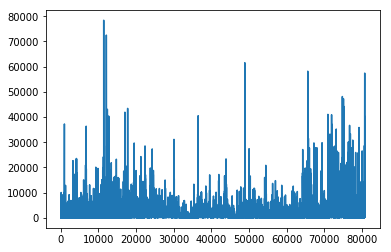

In [18]:
coinapi.volume_traded.plot()

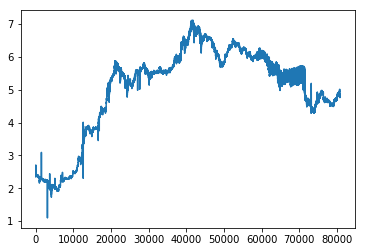

In [20]:
pd.Series(np.log(coinapi.price_close)).plot()

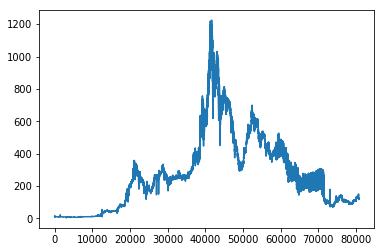

In [19]:
coinapi.price_close.plot()

In [26]:
coinapi['log_ret'] = pd.Series(np.log(coinapi.price_close)).diff()

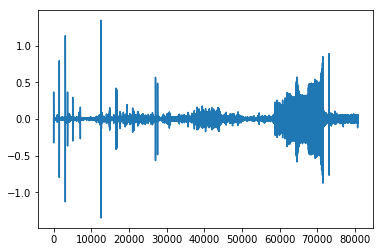

In [33]:
coinapi.log_ret.plot()

What the fuck is going on with this data??? Are the intervalls changing? Does BTC-ETH also look this weird?

In [39]:
deltas = coinapi.time_period_end.apply(parser.parse) - coinapi.time_period_start.apply(parser.parse)

In [48]:
(deltas != timedelta(0,15*60)).sum()

0

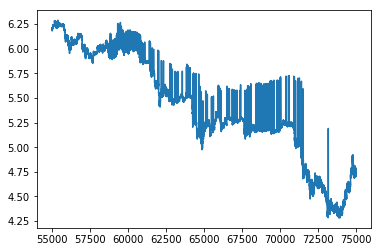

In [50]:
pd.Series(np.log(coinapi.price_close))[55000:75000].plot()

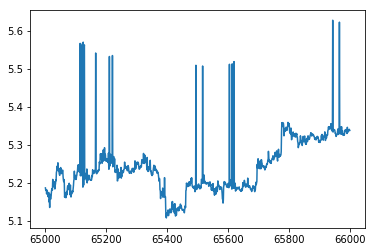

In [52]:
pd.Series(np.log(coinapi.price_close))[65000:66000].plot()

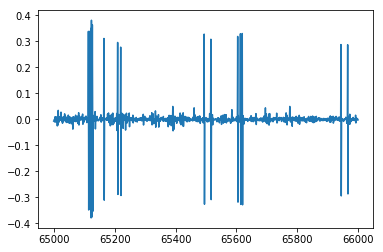

In [53]:
coinapi.log_ret[65000:66000].plot()

So beautifull... Does this also skew the volume stuff?

In [93]:
coinapi[65000:72000][coinapi.log_ret[65000:72000] > 0.25]

price_close  price_high   price_low  price_open  \
65114    261.84477   261.99881  184.790000  186.510000   
65120    260.80156   262.10387  184.907500  185.420000   
65122    262.05121   262.73284  179.690000  184.310000   
65124    262.70634   263.75812  179.020000  179.470000   
65127    259.76251   261.84477  179.077660  259.810480   
65165    255.30741   255.30741  184.630000  190.721722   
65210    252.97940   252.97940  187.700000  188.190000   
65220    253.61457   253.61457  189.600000  190.790000   
65494    247.19371   247.19371  177.300000  177.790000   
65516    246.72493   246.72493  180.510000  181.830000   
65604    247.83950   247.83950  179.423450  179.880000   
65613    248.10810   248.10810  178.700021  178.930000   
65619    249.59699   249.59699  179.187526  179.410000   
65943    278.30304   278.30304  207.770000  210.674526   
65965    276.89549   276.89549  206.900000  208.000000   
66063    269.80432   269.80432  199.630000  200.260000   
66086    264.36400   265.24000  190.760000  191.180000   
66099    260.28281   261.15980  187.980000  189.130000   
66101    261.54899   261.54899  188.590000  188.920000   
66511    275.65618   275.65618  196.510000  199.970000   
66575    263.12688   263.12688  197.700000  199.840000   
66637    269.29463   269.29463  199.800000  201.020000   
66639    267.65878   267.65878  199.090000  200.790000   
66666    268.97223   268.97223  200.370000  201.570000   
66859    267.22900   267.65877  192.970000  193.200000   
66897    260.92983   260.92983  189.270000  189.900000   
66956    265.82600   266.43500  193.970000  194.370000   
67030    264.99928   264.99928  191.790000  192.660000   
67037    263.41872   263.41872  192.110000  192.600000   
67138    262.44708   262.44708  196.100000  197.900000   
...            ...         ...         ...         ...   
69352    290.33066   290.33066  177.380000  177.390000   
69372    287.15926   287.15926  177.470000  177.590000   
69388    288.88371   288.88371  177.510000  177.780000   
69424    291.96410   292.07613  170.530000  170.720000   
69435    291.43945   291.49314  169.710000  169.750000   
69526    288.14036   288.14036  170.880000  171.000000   
69557    287.85229   287.85229  172.060000  172.640000   
69585    291.37878   301.99170  171.420000  172.110000   
69593    289.37679   292.49030  171.990000  289.582870   
69610    289.97417   289.97417  173.560000  174.240000   
69793    289.87267   291.78625  175.340000  176.000000   
69797    289.87267   290.74236  175.310000  176.510000   
69813    293.66143   294.24875  175.260000  176.130000   
69835    290.85666   291.26392  175.300000  175.990000   
69846    291.90649   291.90649  174.680000  174.680000   
69899    291.62000   292.81906  174.210000  175.140000   
69967    293.95531   293.95531  174.940000  176.370000   
70011    300.02901   300.02901  183.940000  185.040000   
70017    300.32927   300.32927  183.400000  183.410000   
70029    303.22459   303.22459  182.010000  185.432000   
70394    305.50302   305.50302  187.050000  187.170000   
70554    306.05349   306.05349  186.480000  187.300000   
70597    306.97249   306.97249  185.280000  185.560000   
70900    305.13800   305.13800  179.760000  180.840000   
70938    303.92110   303.92110  174.600000  174.710000   
71014    291.37690   291.37690  154.680000  156.580000   
71186    299.27404   299.27404  149.800000  149.800000   
71267    299.68448   299.68448  150.530000  150.620000   
71400    289.96622   292.29292  133.243140  137.500000   
71506    268.55487   268.55487  112.040000  114.110000   

                         time_close                     time_open  \
65114  2018-09-14T21:44:57.0000000Z  2018-09-14T21:30:06.3550000Z   
65120  2018-09-14T23:14:54.0000000Z  2018-09-14T23:00:03.4200000Z   
65122  2018-09-14T23:44:49.0000000Z  2018-09-14T23:30:07.0000000Z   
65124  2018-09-15T00:14:57.0000000Z  2018-09-15T00:00:01.0000000Z   
65127  2018-09-15T00:59:55.0000000Z  2018-09-15T00:45:00.0000000Z

The last huge spike ssems to be on 2018-11-20.

In [62]:
coinapi[65110:65120]

price_close  price_high  price_low  price_open  \
65110    186.85000   255.64754     186.52   187.96000   
65111    188.08000   255.28048     186.85   186.86000   
65112    187.41000   256.09812     186.64   188.10000   
65113    186.60000   255.71430     185.23   186.58000   
65114    261.84477   261.99881     184.79   186.51000   
65115    184.78000   263.94372     183.71   186.22000   
65116    188.73000   264.33830     182.74   260.82511   
65117    186.01000   261.21442     184.24   260.12289   
65118    186.23000   259.93924     184.59   259.57572   
65119    185.61000   261.26709     184.99   186.78000   

                         time_close                     time_open  \
65110  2018-09-14T20:44:53.9860000Z  2018-09-14T20:30:00.0250000Z   
65111  2018-09-14T20:59:57.2250000Z  2018-09-14T20:45:10.9260000Z   
65112  2018-09-14T21:14:59.6700000Z  2018-09-14T21:00:01.2780000Z   
65113  2018-09-14T21:29:56.5230000Z  2018-09-14T21:15:10.0000000Z   
65114  2018-09-14T21:44:57.0000000Z  2018-09-14T21:30:06.3550000Z   
65115  2018-09-14T21:59:59.0000000Z  2018-09-14T21:45:00.9670000Z   
65116  2018-09-14T22:14:59.0000000Z  2018-09-14T22:00:00.0000000Z   
65117  2018-09-14T22:29:59.1740000Z  2018-09-14T22:15:08.0000000Z   
65118  2018-09-14T22:44:58.4280000Z  2018-09-14T22:30:02.0000000Z   
65119  2018-09-14T22:59:55.2420000Z  2018-09-14T22:45:01.6430000Z   

                    time_period_end             time_period_start  \
65110  2018-09-14T20:45:00.0000000Z  2018-09-14T20:30:00.0000000Z   
65111  2018-09-14T21:00:00.0000000Z  2018-09-14T20:45:00.0000000Z   
65112  2018-09-14T21:15:00.0000000Z  2018-09-14T21:00:00.0000000Z   
65113  2018-09-14T21:30:00.0000000Z  2018-09-14T21:15:00.0000000Z   
65114  2018-09-14T21:45:00.0000000Z  2018-09-14T21:30:00.0000000Z   
65115  2018-09-14T22:00:00.0000000Z  2018-09-14T21:45:00.0000000Z   
65116  2018-09-14T22:15:00.0000000Z  2018-09-14T22:00:00.0000000Z   
65117  2018-09-14T22:30:00.0000000Z  2018-09-14T22:15:00.0000000Z   
65118  2018-09-14T22:45:00.0000000Z  2018-09-14T22:30:00.0000000Z   
65119  2018-09-14T23:00:00.0000000Z  2018-09-14T22:45:00.0000000Z   

       trades_count  volume_traded   log_ret  
65110         355.0    1196.940569 -0.005923  
65111         433.0    1928.390048  0.006561  
65112         251.0    1018.625991 -0.003569  
65113         404.0    1924.658616 -0.004331  
65114         338.0    1130.240686  0.338785  
65115         540.0    1434.424898 -0.348586  
65116         619.0    1363.606561  0.021151  
65117         322.0     998.783494 -0.014517  
65118         273.0     753.140485  0.001182  
65119         254.0     553.259646 -0.003335

This is ridiculous! Even the high price is completely out of whack.

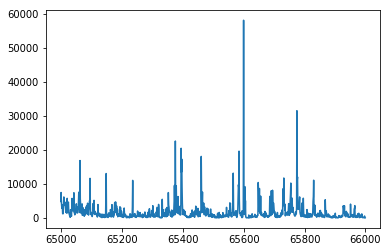

In [69]:
coinapi[65000:66000].volume_traded.plot()

Seems reasonable to me.... Probably there was one of the 500 exchanges where the coin traded at a ridiculous premium, assuming that the premium stems from ETHBTC and not from BTCEUR. I should try to find which is the cause.

In [84]:
meta = pd.read_hdf('../data/coinapi/metadata.h5')

In [96]:
eth_data_end = meta[meta.asset_id_base == 'ETH'].data_end.dropna()
eth_data_end[eth_data_end.apply(parser.parse) == datetime(2018, 11, 20)]

14807    2018-11-20
14885    2018-11-20
15050    2018-11-20
15057    2018-11-20
15167    2018-11-20
15271    2018-11-20
Name: data_end, dtype: object

A number of exchanges stopped providing ETH data exactly on that where the data returns to normal.

In [102]:
bad_exchanges = eth_data_end[eth_data_end.apply(parser.parse) == datetime(2018, 11, 20)].index
meta.iloc[bad_exchanges]

asset_id_base asset_id_quote asset_id_unit    data_end  \
14807           ETH            USD           NaN  2018-11-20   
14885           ETH            BTC           NaN  2018-11-20   
15050           ETH            RUB           NaN  2018-11-20   
15057           ETH            LTC           NaN  2018-11-20   
15167           ETH            EUR           NaN  2018-11-20   
15271           ETH            ZEC           NaN  2018-11-20   

                 data_orderbook_end          data_orderbook_start  \
14807  2018-11-20T00:00:00.0000000Z  2017-12-24T13:04:27.8650074Z   
14885  2018-11-20T00:00:00.0000000Z  2017-12-24T13:04:41.9089766Z   
15050  2018-11-20T00:00:00.0000000Z  2017-12-24T13:04:07.5272848Z   
15057  2018-11-20T00:00:00.0000000Z  2017-12-24T13:03:42.9064646Z   
15167  2018-11-20T00:00:00.0000000Z  2017-12-24T13:03:54.2549616Z   
15271  2018-11-20T00:00:00.0000000Z  2018-01-19T02:30:30.4779740Z   

                     data_quote_end              data_quote_start  data_start  \
14807  2018-11-20T00:00:00.0000000Z  2017-12-24T13:04:27.8650074Z  2017-12-24   
14885  2018-11-20T00:00:00.0000000Z  2017-12-24T13:04:41.9089766Z  2017-12-24   
15050  2018-11-20T00:00:00.0000000Z  2017-12-24T13:04:07.5272848Z  2017-12-24   
15057  2018-11-20T00:00:00.0000000Z  2017-12-24T13:03:42.9064646Z  2017-12-24   
15167  2018-11-20T00:00:00.0000000Z  2017-12-24T13:03:54.2549616Z  2017-12-24   
15271  2018-11-20T00:00:00.0000000Z  2018-01-19T02:30:30.4779740Z  2018-01-18   

                     data_trade_end       ...        option_strike_price  \
14807  2018-11-20T00:00:00.0000000Z       ...                        NaN   
14885  2018-11-20T00:00:00.0000000Z       ...                        NaN   
15050  2018-11-20T00:00:00.0000000Z       ...                        NaN   
15057  2018-11-20T00:00:00.0000000Z       ...                        NaN   
15167  2018-11-20T00:00:00.0000000Z       ...                        NaN   
15271  2018-11-20T00:00:00.0000000Z       ...                        NaN   

      option_type_is_call           symbol_id symbol_type volume_1day  \
14807                 NaN  WEXNZ_SPOT_ETH_USD        SPOT         0.0   
14885                 NaN  WEXNZ_SPOT_ETH_BTC        SPOT         0.0   
15050                 NaN  WEXNZ_SPOT_ETH_RUB        SPOT         0.0   
15057                 NaN  WEXNZ_SPOT_ETH_LTC        SPOT         0.0   
15167                 NaN  WEXNZ_SPOT_ETH_EUR        SPOT         0.0   
15271                 NaN  WEXNZ_SPOT_ETH_ZEC        SPOT         0.0   

      volume_1day_usd  volume_1hrs volume_1hrs_usd volume_1mth  \
14807             0.0          0.0             0.0         0.0   
14885             0.0          0.0             0.0         0.0   
15050             0.0          0.0             0.0         0.0   
15057             0.0          0.0             0.0         0.0   
15167             0.0          0.0             0.0         0.0   
15271             0.0          0.0             0.0         0.0   

       volume_1mth_usd  
14807              0.0  
14885              0.0  
15050              0.0  
15057              0.0  
15167              0.0  
15271              0.0  

[6 rows x 29 columns]

**The wex exchange, aka the new BTC-e, is probably skewing the data**, so this would have nothing to do with the conversion to EUR. There is even [an article](https://cryptovest.com/news/bitcoin-btc-altcoins-still-trade-at-premium-on-wex-exchange/) talking about how cryptos traded at a premium on wex. I think the volume data should be just fine, but it is quite weird that the close price also jumps from time to time to the *WEX* level, it would be beneficial to know how the data is aggregated, since at the moment I can only come up with the explanation that at those specific timesteps no other exchange traded. Or maybe the data was just sampled across exchanges, which would be just stupid.

Is the mean price affected by the WEX data ending?

In [110]:
from datetime import date
parser.parse(coinapi.time_period_end[0]).date()

datetime.date(2016, 6, 6)

In [122]:
parser.parse(coinapi.time_period_end[71506]).date() == date(2018, 11, 20)

True

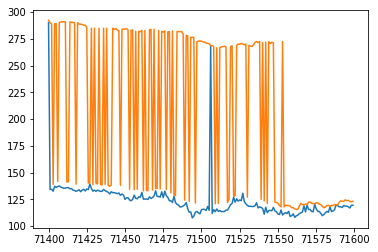

In [126]:
coinapi.price_close[71400:71600].plot()
coinapi.price_high[71400:71600].plot()

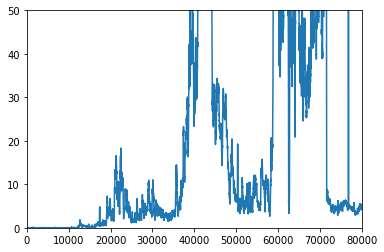

In [144]:
fstx = 1
lastx = 80000
ax = plt.gca(xlim=(fstx, lastx), ylim=(0, 50))

ax.plot((coinapi[fstx:lastx].price_high - coinapi[fstx:lastx].price_close).rolling(100).mean())

The high price seems to be out of whack on a sizeble chunk of the data.